# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                     PI                        \
var                                       SS DF      F p-unc   np2   
protein groups               Source                                  
A0A024QZX5;A0A087X1N8;P35237 AD        0.944  1  1.677 0.197 0.009   
                             age       0.017  1  0.030 0.862 0.000   
                             Kiel      1.789  1  3.178 0.076 0.016   
                             Magdeburg 4.500  1  7.994 0.005 0.040   
                             Sweden    7.468  1 13.266 0.000 0.065   
...                                      ... ..    ...   ...   ...   
S4R3U6                       AD        0.026  1  0.025 0.875 0.000   
                             age       2.090  1  1.976 0.161 0.010   
                             Kiel      0.014  1  0.013 0.909 0.000   
                             Magdeburg 4.435  1  4.193 0.042 0.021   
                             Sweden    9.257  1  8.752 0.003 0.044   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.706  0.346    False  
                             age               0.064  0.921    False  
                             Kiel              1.118  0.169    False  
                             Magdeburg         2.284  0.020     True  
                             Sweden            3.458  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.058  0.928    False  
                             age               0.792  0.298    False  
                             Kiel              0.041  0.948    False  
                             Magdeburg         1.377  0.106    False  
                             Sweden            2.458  0.014     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.661  1  4.086 0.045 0.021   
                             age        0.009  1  0.053 0.818 0.000   
                             Kiel       0.423  1  2.615 0.108 0.014   
                             Magdeburg  1.021  1  6.313 0.013 0.032   
                             Sweden     2.609  1 16.125 0.000 0.078   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         5.823  1  2.955 0.087 0.015   
                             age        2.251  1  1.142 0.286 0.006   
                             Kiel       8.450  1  4.288 0.040 0.022   
                             Magdeburg 17.179  1  8.717 0.004 0.044   
                             Sweden     0.614  1  0.311 0.577 0.002   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.350  0.105    False  
                             age               0.087  0.883    False  
                             Kiel              0.969  0.208    False  
                             Magdeburg         1.892  0.038     True  
                             Sweden            4.070  0.000     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.059  0.176    False  
                             age               0.543  0.434    False  
                             Kiel              1.401  0.095    False  
                             Magdeburg         2.450  0.013     True  
                             Sweden            0.239  0.698    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.197         0.706  0.346    False   
                             Kiel      0.076         1.118  0.169    False   
                             Magdeburg 0.005         2.284  0.020     True   
                             Sweden    0.000         3.458  0.002     True   
                             age       0.862         0.064  0.921    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.875         0.058  0.928    False   
                             Kiel      0.909         0.041  0.948    False   
                             Magdeburg 0.042         1.377  0.106    False   
                             Sweden    0.003         2.458  0.014     True   
                             age       0.161         0.792  0.298    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.045         1.350  0.105    False  
                             Kiel      0.108         0.969  0.208    False  
                             Magdeburg 0.013         1.892  0.038     True  
                             Sweden    0.000         4.070  0.000     True  
                             age       0.818         0.087  0.883    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.087         1.059  0.176    False  
                             Kiel      0.040         1.401  0.095    False  
                             Magdeburg 0.004         2.450  0.013     True  
                             Sweden    0.577         0.239  0.698    False  
                             age       0.286         0.543  0.434    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.482     0.338     0.244         2.740     0.311
std       0.303         5.339     0.331     0.296         5.172     0.323
min       0.000         0.000     0.000     0.000         0.001     0.000
25%       0.004         0.330     0.015     0.002         0.361     0.008
50%       0.120         0.921     0.240     0.091         1.039     0.183
75%       0.468         2.423     0.623     0.435         2.725     0.580
max       1.000       144.677     1.000     0.999        85.658     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_49863/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.197         0.706   
A0A024R0T9;K7ER74;P02655                           AD     0.051         1.291   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.144         0.841   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.568         0.246   
A0A075B6H7                                         AD     0.135         0.868   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.011         1.969   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.948         0.023   
S4R3U6                                             AD     0.875         0.058   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.346    False   
A0A024R0T9;K7ER74;P02655                           AD      0.124    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.275    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.706    False   
A0A075B6H7                                         AD      0.262    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.317    False   
Q9Y6X5                                             AD      0.036     True   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.180    False   
Q9Y6Y9                                             AD      0.971    False   
S4R3U6                                             AD      0.928    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.045         1.350   
A0A024R0T9;K7ER74;P02655                           AD     0.034         1.470   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.405         0.393   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.296         0.529   
A0A075B6H7                                         AD     0.388         0.411   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.058         1.240   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.446         0.351   
S4R3U6                                             AD     0.087         1.059   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.105    False  
A0A024R0T9;K7ER74;P02655                           AD      0.084    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.554    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.444    False  
A0A075B6H7                                         AD      0.538    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.251         1.411     0.334     0.247         1.486     0.321
std       0.288         1.648     0.315     0.286         1.782     0.311
min       0.000         0.001     0.000     0.000         0.002     0.000
25%       0.012         0.361     0.040     0.009         0.358     0.028
50%       0.121         0.918     0.241     0.108         0.967     0.209
75%       0.435         1.914     0.595     0.439         2.039     0.583
max       0.998        23.264     0.998     0.996        25.478     0.997

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1030,1001


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.197         0.706  0.346   
A0A024R0T9;K7ER74;P02655                           0.051         1.291  0.124   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.144         0.841  0.275   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.568         0.246  0.706   
A0A075B6H7                                         0.135         0.868  0.262   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.317   
Q9Y6X5                                             0.011         1.969  0.036   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.180   
Q9Y6Y9                                             0.948         0.023  0.971   
S4R3U6                                             0.875         0.058  0.928   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.045   
A0A024R0T9;K7ER74;P02655                              False 0.034   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.405   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.296   
A0A075B6H7                                            False 0.388   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                 True 0.058   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.446   
S4R3U6                                                False 0.087   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.350  0.105   
A0A024R0T9;K7ER74;P02655                                   1.470  0.084   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.393  0.554   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.529  0.444   
A0A075B6H7                                                 0.411  0.538   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.303   
Q9Y6X5                                                     1.240  0.128   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.351  0.588   
S4R3U6                                                     1.059  0.176   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    967
PI (yes) - QRILC (yes)   357
PI (no)  - QRILC (yes)    63
PI (yes) - QRILC (no)     34
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_49863/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.021         1.670  0.062    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.001         3.193  0.003     True   
A0A087WWT2;Q9NPD7                     0.030         1.522  0.081    False   
A0A087X1G7;A0A0B4J1S4;O60613          0.029         1.540  0.079    False   
A0A0A0MQS9;A0A0A0MTC7;Q16363;Q16363-2 0.439         0.358  0.599    False   
...                                     ...           ...    ...      ...   
Q9NYX4                                0.043         1.363  0.109    False   
Q9P0K9                                0.045         1.343  0.113    False   
Q9UNW1                                0.010         1.999  0.034     True   
Q9UQ52                                0.050         1.304  0.121    False   
Q9Y6X5                                0.011         1.969  0.036     True   

                                      QRILC                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.003         2.536  0.011     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.118         0.928  0.224    False   
A0A087WWT2;Q9NPD7                     0.006         2.210  0.021     True   
A0A087X1G7;A0A0B4J1S4;O60613          0.009         2.026  0.029     True   
A0A0A0MQS9;A0A0A0MTC7;Q16363;Q16363-2 0.011         1.949  0.034     True   
...                                     ...           ...    ...      ...   
Q9NYX4                                0.007         2.170  0.022     True   
Q9P0K9                                0.010         1.996  0.031     True   
Q9UNW1                                0.175         0.757  0.303    False   
Q9UQ52                                0.006         2.239  0.020     True   
Q9Y6X5                                0.058         1.240  0.128    False   

                                           data  
                                      frequency  
protein groups                                   
A0A075B6I0                                  194  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2       114  
A0A087WWT2;Q9NPD7                           193  
A0A087X1G7;A0A0B4J1S4;O60613                184  
A0A0A0MQS9;A0A0A0MTC7;Q16363;Q16363-2        92  
...                                         ...  
Q9NYX4                                      195  
Q9P0K9                                      192  
Q9UNW1                                      171  
Q9UQ52                                      188  
Q9Y6X5                                      173  

[97 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.346,0.105,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.124,0.084,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.275,0.554,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.706,0.444,196,PI (no) - QRILC (no)
A0A075B6H7,0.262,0.538,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.317,0.303,197,PI (no) - QRILC (no)
Q9Y6X5,0.036,0.128,173,PI (yes) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.180,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
J3KSJ8;Q9UD71;Q9UD71-2,0.913,0.027,51,PI (no) - QRILC (yes),0.886
E5RK69;E7EMC6;P08133;P08133-2,0.042,0.851,80,PI (yes) - QRILC (no),0.809
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.631,0.007,86,PI (no) - QRILC (yes),0.623
G3V295;G3V3I1;G3V5Z7;P60900,0.623,0.022,95,PI (no) - QRILC (yes),0.601
P43004;P43004-2;P43004-3,0.611,0.011,89,PI (no) - QRILC (yes),0.601
...,...,...,...,...,...
Q92542;Q92542-2,0.057,0.045,193,PI (no) - QRILC (yes),0.012
Q16706,0.054,0.043,195,PI (no) - QRILC (yes),0.011
K7ERI9;P02654,0.041,0.052,196,PI (yes) - QRILC (no),0.011


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


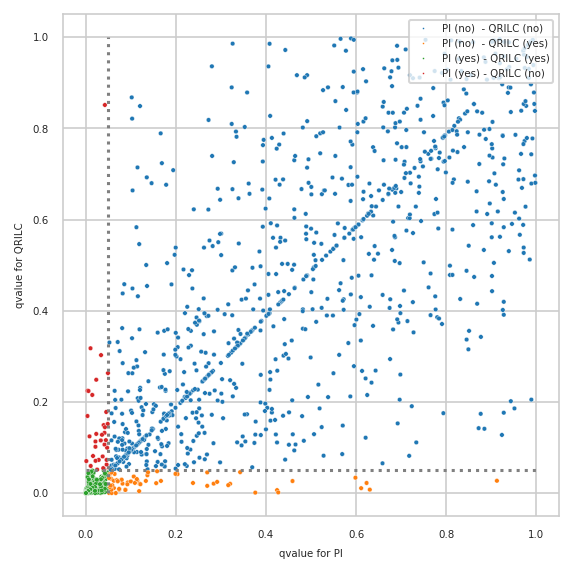

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


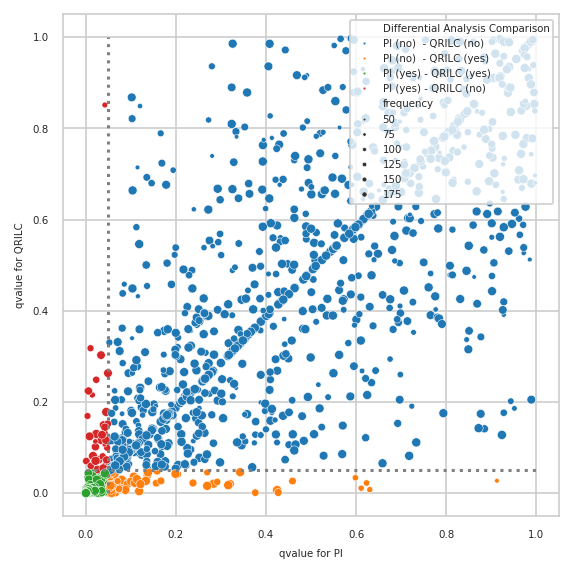

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
PSEN2,ENSP00000355747,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
FRAT2,ENSP00000360058,0.681
DSC2,ENSP00000280904,0.681
CLEC4M,ENSP00000316228,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out